In [10]:
import importlib #библиотека для импорта модулей
import os # использую работу с файлами
from abstractmodule import AbstractModule # для проверки типов

In [11]:
importlib.invalidate_caches() # очистить кеш импорта
module_dir = './'
imports = []
step = 0
MAXSTEPS = 200 #максимально возможное число шагов моделирования
results = {}
with os.scandir(module_dir) as files:
    for file in files : # считали все файлы из каталога
        #print(file.name)
        if file.name.endswith("py") and file.name != "abstractmodule.py" and "test" not in file.name:
            # нужны файлы *.py
            module_name = file.name.replace(".py", "")
            unit = importlib.import_module(module_name) # импортирую полученный модуль
            #print(dir(unit))
            if "createinstance" in dir(unit): 
                imports.append(unit)  # если в модуле есть createinstance, добавляю этот модуль в список
instances = []
for element in imports:
    #print(dir(element))
    instance = element.createinstance()
    if isinstance(instance, AbstractModule):
        # добавляем в список только модули
        instances.append(instance)
for instance in instances:
    # печатаем состав того, чего наимпортировали
    print(f"Module name: '{instance.name()}'")
#print("begin modelling")
for instance in instances:    
    instance.prepare() # нулевой шаг моделирования - задание начальных условий
    results[instance.name()] = [[],[]]  #записываю результаты моделирования как словарь
    #print(f"making preparations for {instance.name()}")
#print("stepping begins")
done = False
while not done and step < MAXSTEPS: # где тут ошибка?  это цикл шагов моделирования
    done = True
    step += 1
    #print(f"step {step} : ")
    for instance in instances:
        instance_done = instance.is_done() # один раз проверяем is_done().
        done = done and instance_done
        if not instance_done: # проверка на конец счета
            # делаем шаг, записываем результаты
            result_on_step = instance.step()
            results[instance.name()][0].append(result_on_step[0])
            results[instance.name()][1].append(result_on_step[1])
#print("end stepping")
#print(results)    

Module name: 'Сountdown'
Module name: 'andreev_alexander_some_module'
Module name: 'mvandreeva_git_plant_trees'
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Preparing
Посадили, сколько смогли
Посадили, сколько смогли


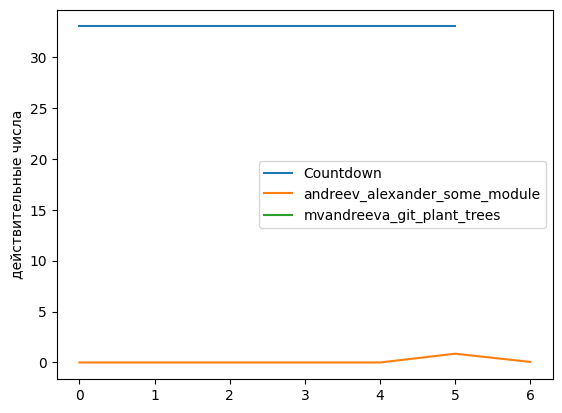

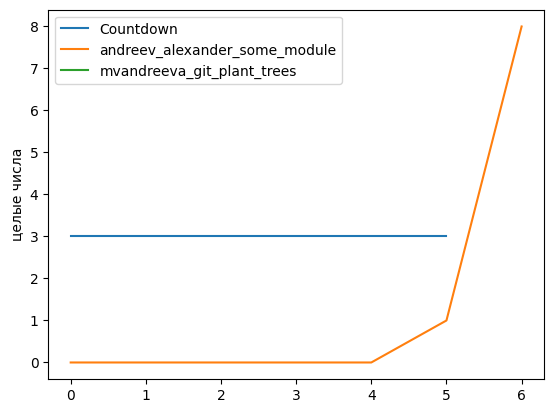

In [12]:
#рисуем графики результатов. в графиках я не очень разбираюсь 
#и врядли круто разберусь до четверга
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for single_data_name in results:
    ax.plot(results[single_data_name][0], label = single_data_name)
    ax.legend()
plt.ylabel('действительные числа')
plt.show()

fig, ax = plt.subplots()
for single_data_name in results:
    ax.plot(results[single_data_name][1], label = single_data_name)
    ax.legend()
plt.ylabel('целые числа')
plt.show()




In [13]:
print(results)

{'Сountdown': [[33.0, 33.0, 33.0, 33.0, 33.0, 33.0], [3, 3, 3, 3, 3, 3]], 'andreev_alexander_some_module': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.8611328560063262, 0.05301195881381782], [0, 0, 0, 0, 0, 1, 8]], 'mvandreeva_git_plant_trees': [[5], [5]]}
